<a href="https://colab.research.google.com/github/Anushree-15-lab/ML-LAB/blob/main/%207EM-KMEANS-BUILTIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np

In [15]:
iris = datasets.load_iris()


In [16]:
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']


In [20]:
y = pd.DataFrame(iris.target)
y.columns = ['Targets']


In [21]:
model = KMeans(n_clusters=3)
model.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [22]:
plt.figure(figsize=(14,7))


<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

In [23]:
colormap = np.array(['red', 'lime', 'black'])


Text(0, 0.5, 'Petal Width')

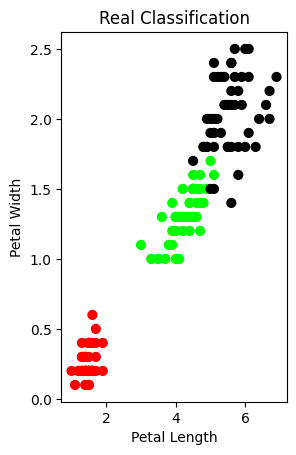

In [24]:
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')


The accuracy score of K-Mean:  0.09333333333333334
The Confusion matrixof K-Mean:  [[ 0 50  0]
 [ 2  0 48]
 [36  0 14]]


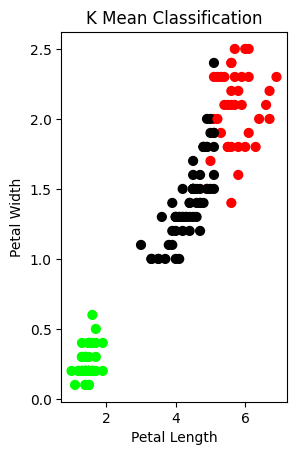

In [25]:
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('The accuracy score of K-Mean: ',sm.accuracy_score(y, model.labels_))
print('The Confusion matrixof K-Mean: ',sm.confusion_matrix(y, model.labels_))


In [26]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
#xs.sample(5)


In [27]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)


GaussianMixture(n_components=3)

In [28]:
y_gmm = gmm.predict(xs)
#y_cluster_gmm


The accuracy score of EM:  0.03333333333333333
The Confusion matrix of EM:  [[ 0  0 50]
 [45  5  0]
 [ 0 50  0]]


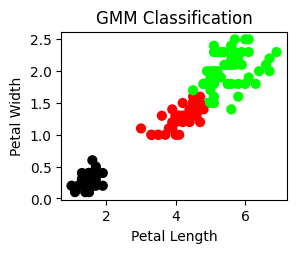

In [29]:
plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_gmm], s=40)
plt.title('GMM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

print('The accuracy score of EM: ',sm.accuracy_score(y, y_gmm))
print('The Confusion matrix of EM: ',sm.confusion_matrix(y, y_gmm))